In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.decomposition import PCA

C:\Users\rayan\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rayan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\rayan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
data = pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# 1 - Preprocessing

In [3]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data = data.rename(columns={"parental level of education":"parental_level_of_education", "test preparation course":"test_preparation_course",
                   "math score":"math_score", "reading score":"reading_score", "writing score":"writing_score"})

data

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
data = data.drop(['race/ethnicity'], axis=1)
data

,gender,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,bachelor's degree,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's degree,standard,none,90,95,93
3,male,associate's degree,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...
995,female,master's degree,standard,completed,88,99,95
996,male,high school,free/reduced,none,62,55,55
997,female,high school,free/reduced,completed,59,71,65
998,female,some college,standard,completed,68,78,77


# 2 - Data visualazation

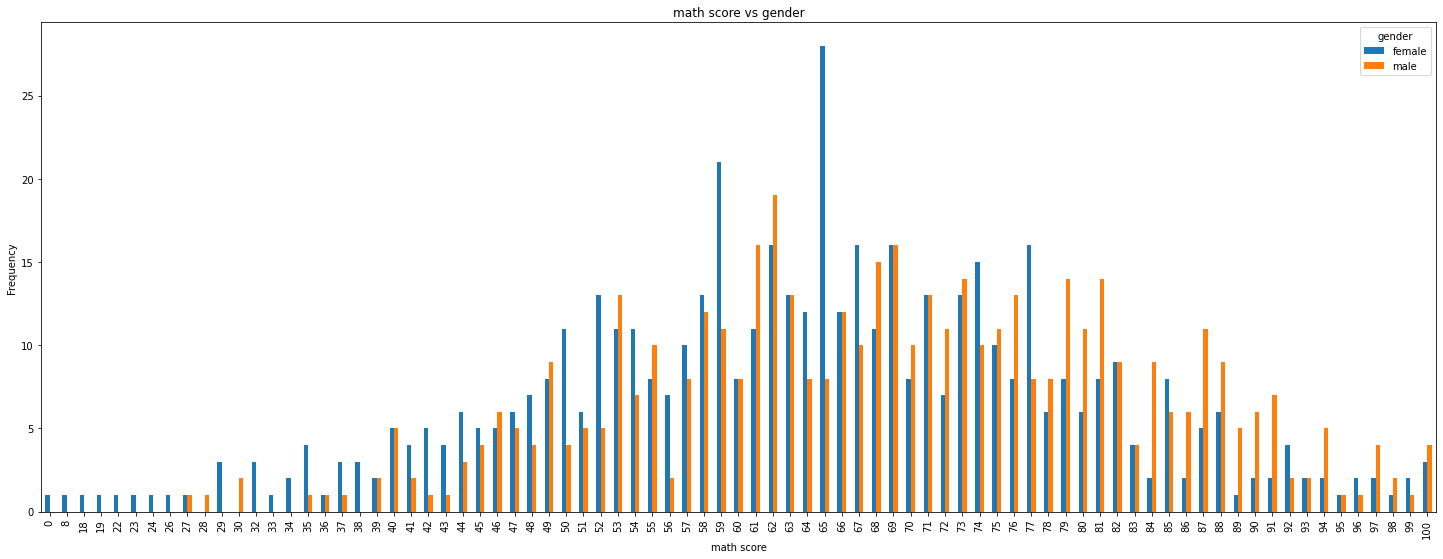

In [6]:
pd.crosstab(data.math_score,data.gender).plot(kind="bar",figsize=(25,9))
plt.title('math score vs gender')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.show()

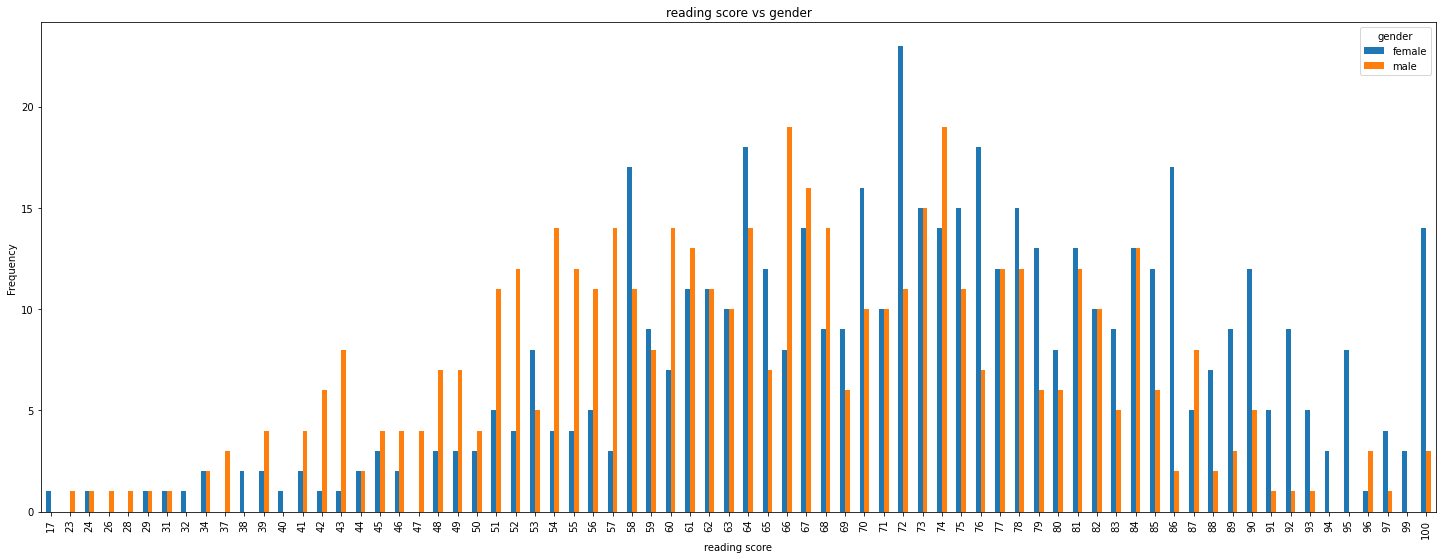

In [7]:
pd.crosstab(data.reading_score,data.gender).plot(kind="bar",figsize=(25,9))
plt.title('reading score vs gender')
plt.xlabel('reading score')
plt.ylabel('Frequency')
plt.show()

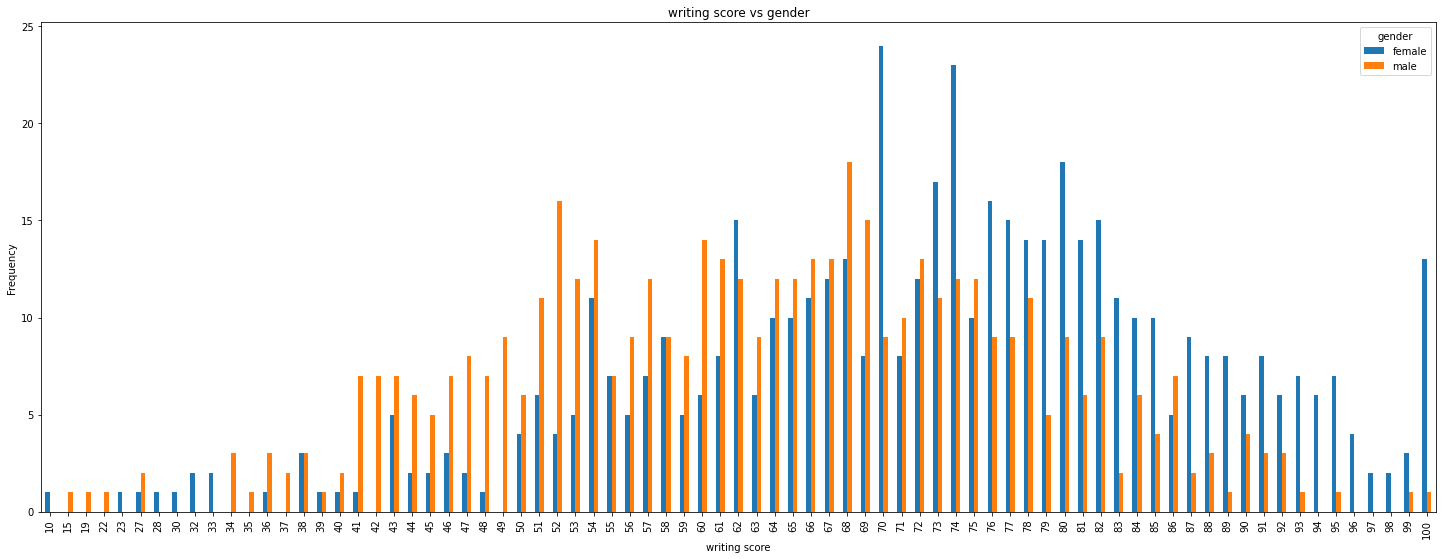

In [8]:
pd.crosstab(data.writing_score,data.gender).plot(kind="bar",figsize=(25,9))
plt.title('writing score vs gender')
plt.xlabel('writing score')
plt.ylabel('Frequency')
plt.show()

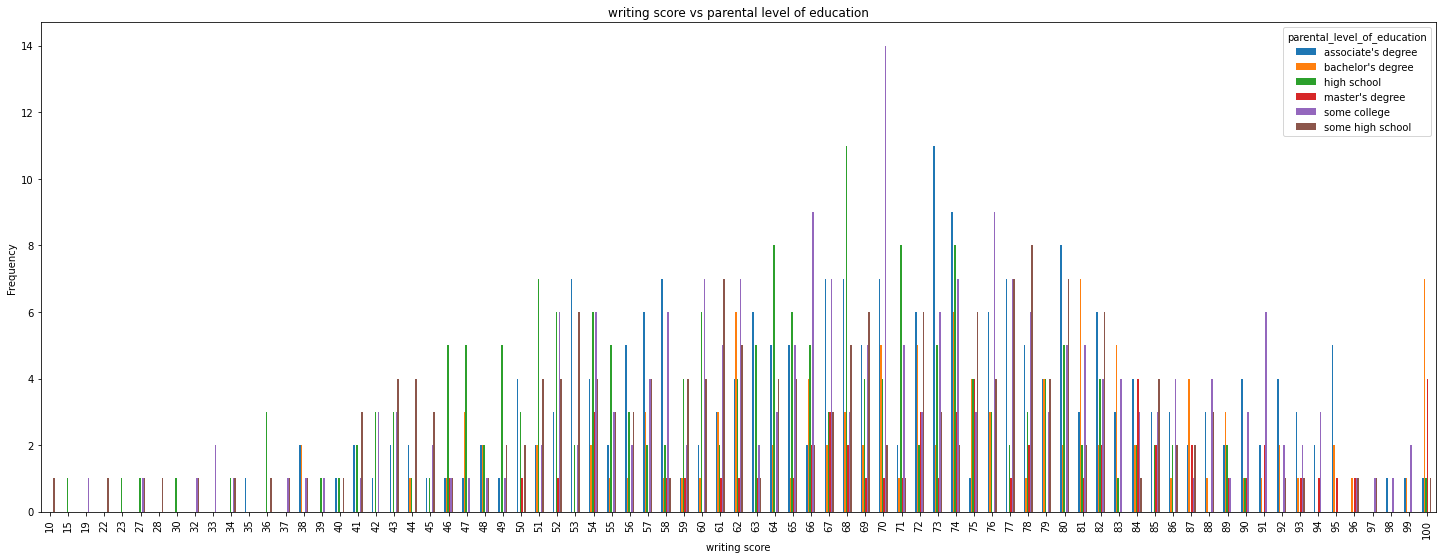

In [9]:
pd.crosstab(data.writing_score,data.parental_level_of_education).plot(kind="bar",figsize=(25,9))
plt.title('writing score vs parental level of education')
plt.xlabel('writing score')
plt.ylabel('Frequency')
plt.show()

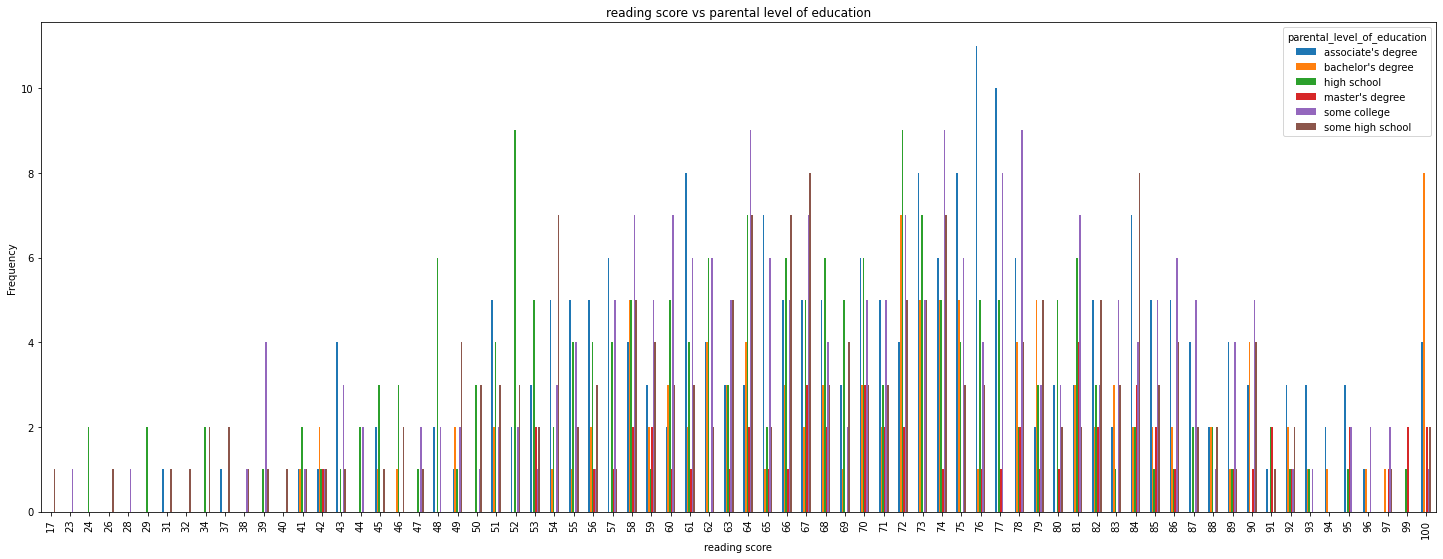

In [10]:
pd.crosstab(data.reading_score,data.parental_level_of_education).plot(kind="bar",figsize=(25,9))
plt.title('reading score vs parental level of education')
plt.xlabel('reading score')
plt.ylabel('Frequency')
plt.show()

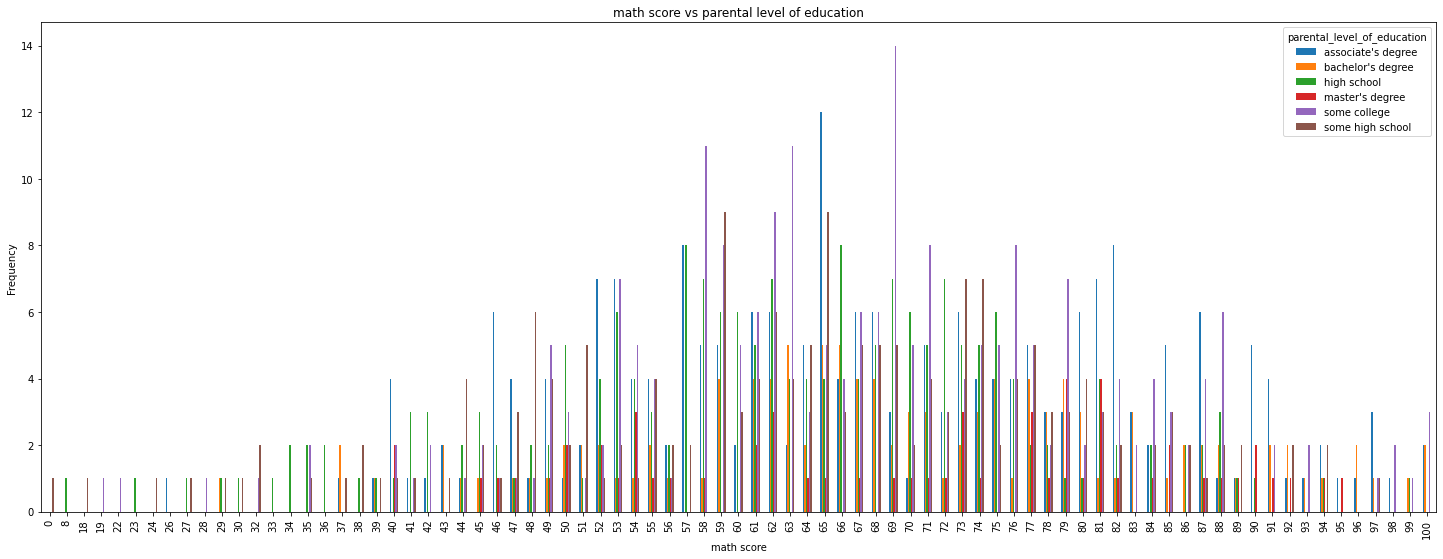

In [11]:
pd.crosstab(data.math_score,data.parental_level_of_education).plot(kind="bar",figsize=(25,9))
plt.title('math score vs parental level of education')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.show()

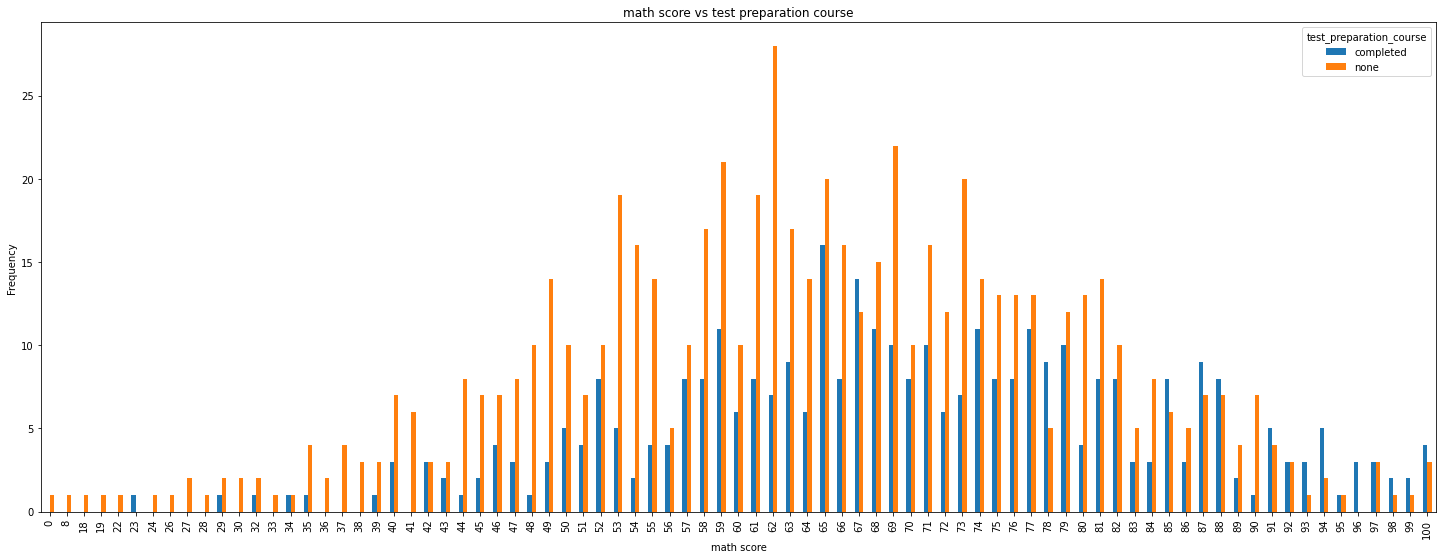

In [12]:
pd.crosstab(data.math_score,data.test_preparation_course).plot(kind="bar",figsize=(25,9))
plt.title('math score vs test preparation course')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.show()

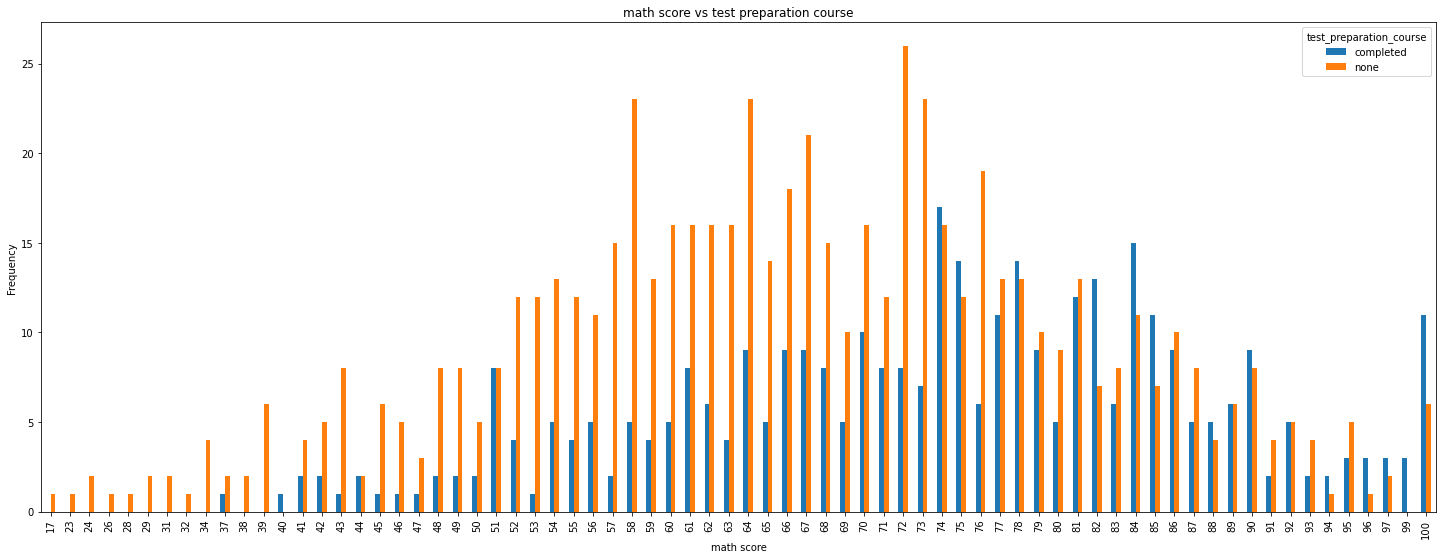

In [13]:
pd.crosstab(data.reading_score,data.test_preparation_course).plot(kind="bar",figsize=(25,9))
plt.title('math score vs test preparation course')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.show()

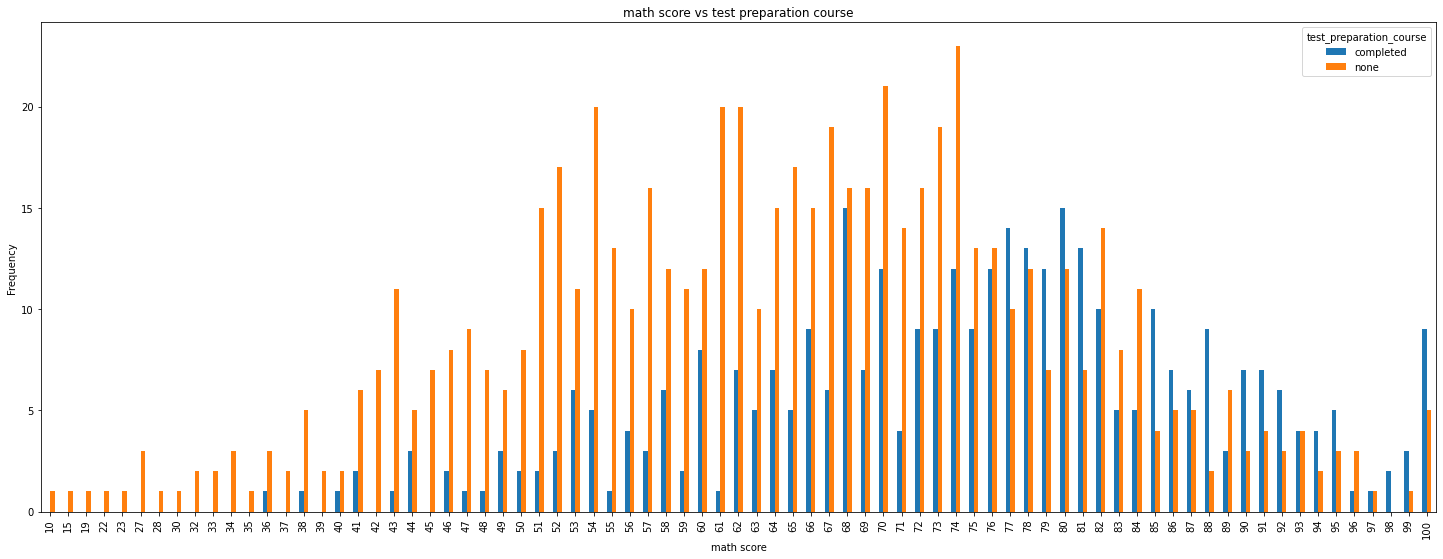

In [14]:
pd.crosstab(data.writing_score,data.test_preparation_course).plot(kind="bar",figsize=(25,9))
plt.title('math score vs test preparation course')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.show()

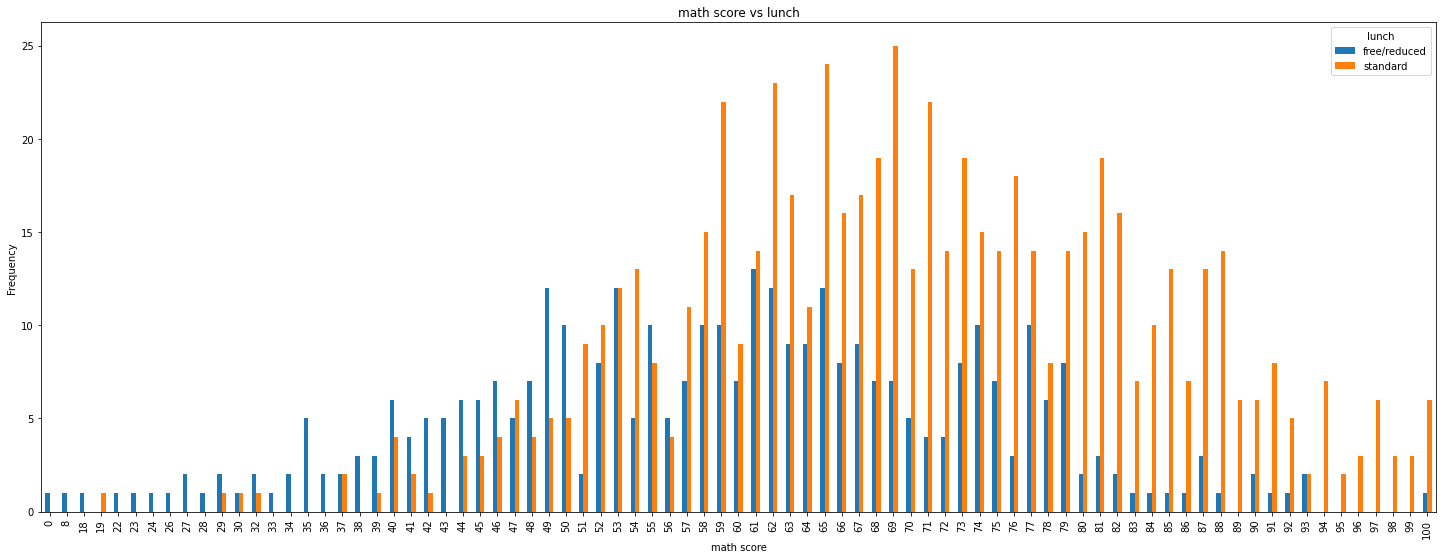

In [15]:
pd.crosstab(data.math_score,data.lunch).plot(kind="bar",figsize=(25,9))
plt.title('math score vs lunch')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.show()

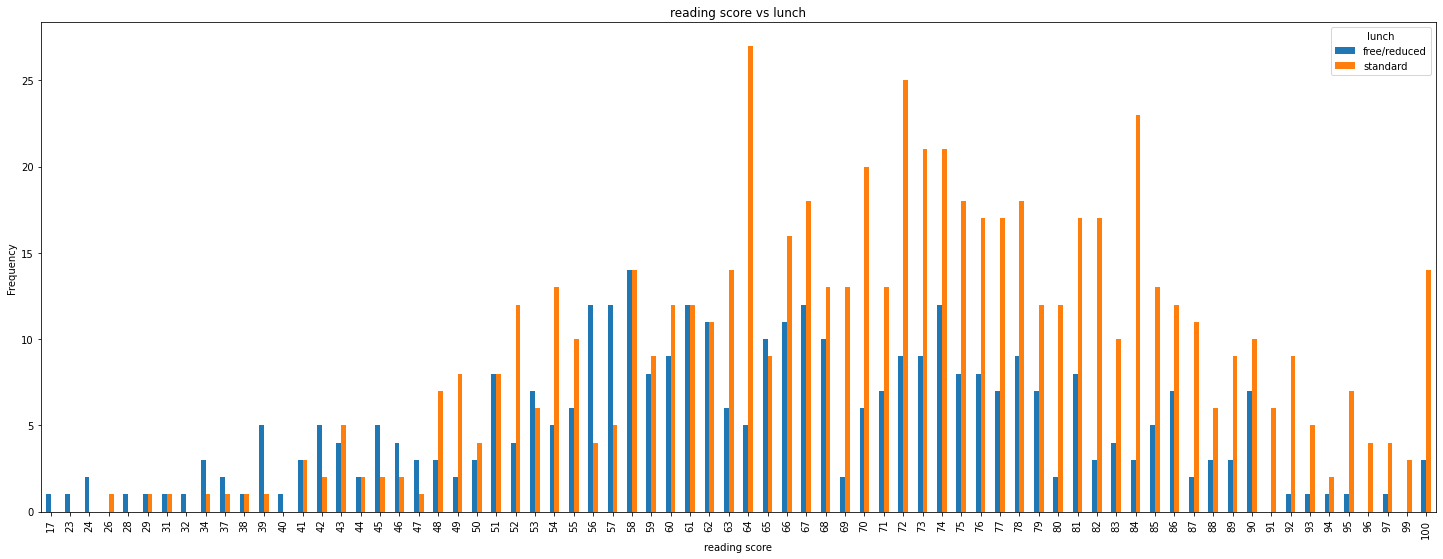

In [16]:
pd.crosstab(data.reading_score,data.lunch).plot(kind="bar",figsize=(25,9))
plt.title('reading score vs lunch')
plt.xlabel('reading score')
plt.ylabel('Frequency')
plt.show()

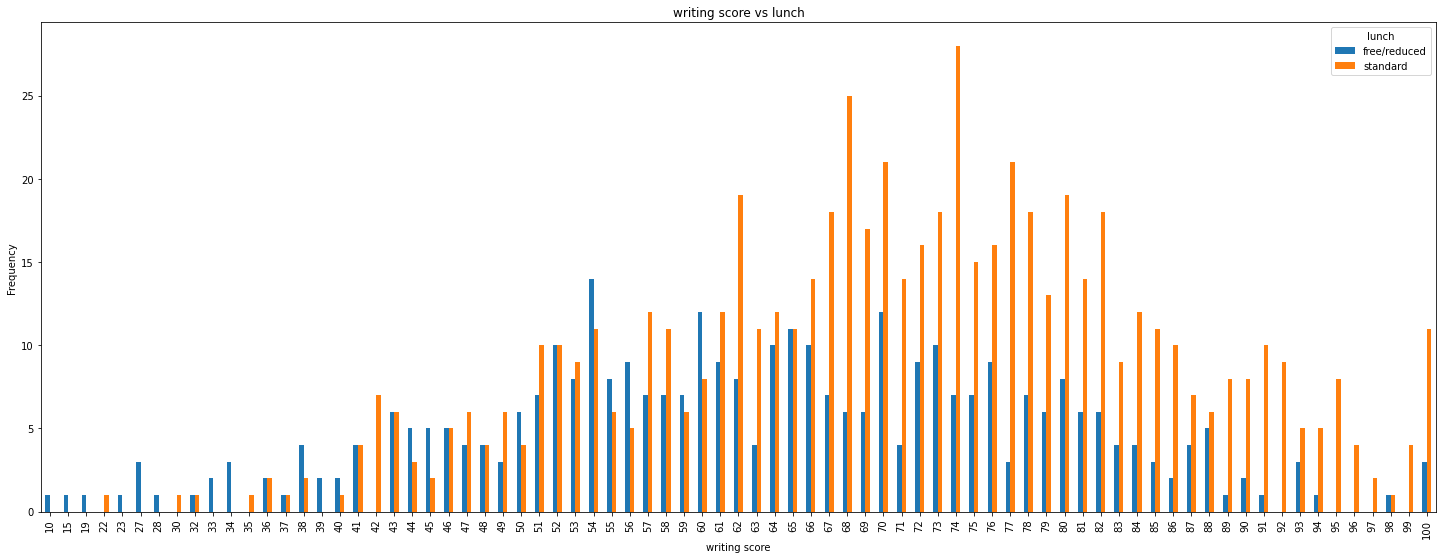

In [17]:
pd.crosstab(data.writing_score,data.lunch).plot(kind="bar",figsize=(25,9))
plt.title('writing score vs lunch')
plt.xlabel('writing score')
plt.ylabel('Frequency')
plt.show()

# 3 - Model build

In [18]:
le = LabelEncoder()
data["gender"] = le.fit_transform(data["gender"])
data["parental_level_of_education"] = le.fit_transform(data["parental_level_of_education"])
data["lunch"] = le.fit_transform(data["lunch"])
data["test_preparation_course"] = le.fit_transform(data["test_preparation_course"])
data

,gender,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,72,72,74
1,0,4,1,0,69,90,88
2,0,3,1,1,90,95,93
3,1,0,0,1,47,57,44
4,1,4,1,1,76,78,75
...,...,...,...,...,...,...,...
995,0,3,1,0,88,99,95
996,1,2,0,1,62,55,55
997,0,2,0,0,59,71,65
998,0,4,1,0,68,78,77


In [19]:
x = data
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=normalize(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6
0,-0.553075,-0.465934,0.425363,0.428154,0.223623,0.111231,0.224465
1,-0.346304,0.297238,0.266338,-0.480756,0.068956,0.512469,0.471468
2,-0.298577,0.087004,0.229632,0.231138,0.488343,0.547895,0.508389
3,0.326399,-0.428043,-0.424397,0.235115,-0.396570,-0.262555,-0.498646
4,0.526886,0.420805,0.377059,0.379532,0.332370,0.307570,0.232438
...,...,...,...,...,...,...,...
995,-0.269939,0.078659,0.207607,-0.374743,0.404575,0.572050,0.496478
996,0.451405,-0.115729,-0.586936,0.325161,-0.117482,-0.422788,-0.374254
997,-0.436384,-0.120234,-0.609783,-0.605809,-0.211604,0.056762,-0.090965
998,-0.445482,0.382364,0.342615,-0.618440,0.058232,0.279473,0.272018


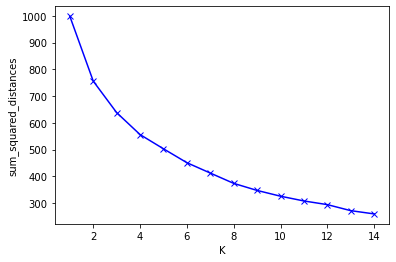

In [20]:
sum_squared_distances=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km.fit(x)
    sum_squared_distances.append(km.inertia_)
    
    
plt.plot(K,sum_squared_distances,"bx-")
plt.xlabel("K")
plt.ylabel("sum_squared_distances")
plt.show()

In [21]:
kmeans=KMeans(n_clusters=4, random_state=30)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=30)

In [22]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,2
1,0
2,0
3,3
4,2
...,...
995,0
996,1
997,1
998,2


In [23]:
prediction=kmeans.predict(data)
print(kmeans.cluster_centers_)

[[ 0.40721649  2.33505155  0.80927835  0.45876289 85.33505155 88.49484536
  87.79896907]
 [ 0.51535836  2.50853242  0.55972696  0.72013652 58.70307167 61.48122867
  60.45392491]
 [ 0.44044321  2.44044321  0.71191136  0.60387812 70.92520776 74.51800554
  73.68144044]
 [ 0.61184211  2.74342105  0.44078947  0.81578947 44.27631579 46.61842105
  44.13815789]]


In [24]:
pca=PCA(n_components=2)
data_copy=pca.fit_transform(x)
data_copy=pd.DataFrame(data_copy)
data_copy

,0,1
0,-0.413965,-0.320830
1,-0.810272,-0.257067
2,-0.861728,-0.091866
3,0.838599,0.052749
4,-0.324713,0.653912
...,...,...
995,-0.964429,-0.093881
996,0.826589,0.213149
997,0.048639,-0.634235
998,-0.635529,-0.294447


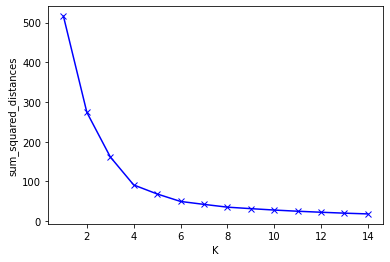

In [30]:
sum_squared_distances=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k, random_state=30)
    km.fit(data_copy)
    sum_squared_distances.append(km.inertia_)
    
    
plt.plot(K,sum_squared_distances,"bx-")
plt.xlabel("K")
plt.ylabel("sum_squared_distances")
plt.show()

In [32]:
kmeans=KMeans(n_clusters=4, random_state=30)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=30)

In [33]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,3
1,1
2,1
3,0
4,3
...,...
995,1
996,2
997,2
998,3


In [41]:
prediction=kmeans.predict(data)
print(kmeans.cluster_centers_)

[[ 0.61184211  2.74342105  0.44078947  0.81578947 44.27631579 46.61842105
  44.13815789]
 [ 0.40721649  2.33505155  0.80927835  0.45876289 85.33505155 88.49484536
  87.79896907]
 [ 0.51535836  2.50853242  0.55972696  0.72013652 58.70307167 61.48122867
  60.45392491]
 [ 0.44044321  2.44044321  0.71191136  0.60387812 70.92520776 74.51800554
  73.68144044]]
